



## March 2024: END SEMESTER ASSESSMENT ESA  
### M.TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

##	UE20CS931 - MACHINE LEARNING - II

The objective is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Class.
---
**Attribute Information:**
- age		-	age
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
-	rbc		-	red blood cells
-	pc		-	pus cell
-	pcc		-	pus cell clumps
-	ba		-	bacteria
-	bgr		-	blood glucose random
-	bu		-	blood urea
-	sc		-	serum creatinine
-	sod		-	sodium
-	pot		-	potassium
-	hemo		-	hemoglobin
-	pcv		-	packed cell volume
-	wc		-	white blood cell count
-	rc		-	red blood cell count
-	htn		-	hypertension
-	dm		-	diabetes mellitus
-	cad		-	coronary artery disease
-	appet		-	appetite
-	pe		-	pedal edema
-	ane		-	anemia
-	classification		-	class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from scipy import stats
import os
sns.set(style='white', context='notebook', palette='deep')

## Section B (marks 40)

### 2(a).  Read the dataset and print the following (6 marks)
      
- Shape of the data (2 mark)
- Number of numerical and categorical variable (2 mark)
- Descriptive stats of numerical data and write inference(2 mark)


In [2]:
df=pd.read_csv('Chronic_Kidney_Disease.csv')
df.head(4)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,14,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd


In [3]:
df.shape

(158, 26)

### 2 (b).What is the distribution of hemoglobin levels (hemo) among patients with and without hypertension (htn)? Explain using visualization. (6 Marks)


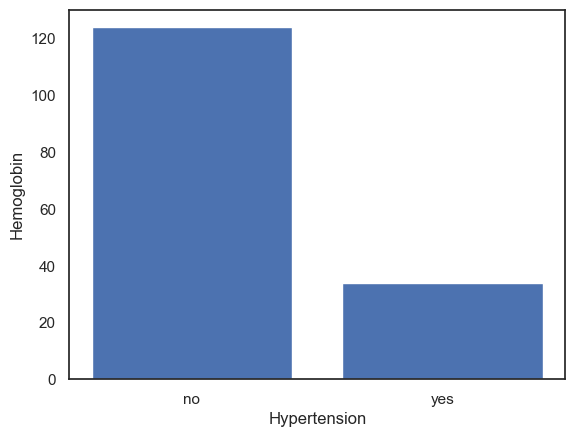

In [16]:
df1 = pd.DataFrame(df.groupby('htn')['hemo'].count())
plt.bar(data=df1,x=df1.index.values,height='hemo')
plt.ylabel('Hemoglobin')
plt.xlabel('Hypertension')
plt.show()

In [18]:
df1

,hemo
htn,
no,124
yes,34


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


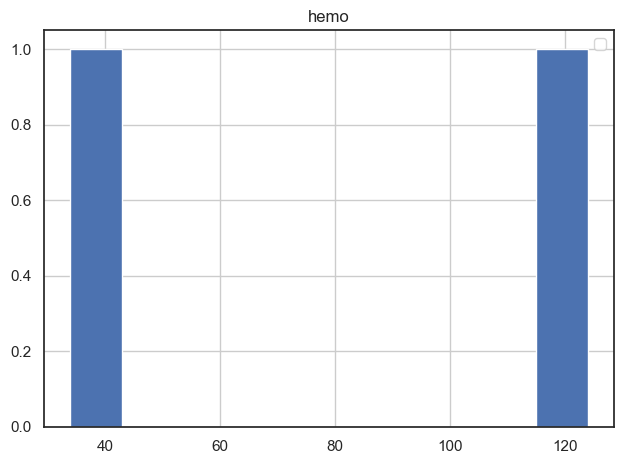

In [17]:
#df.groupby('htn')['hemo'].hist()
df1.hist()
plt.legend()
plt.tight_layout()
plt.show()

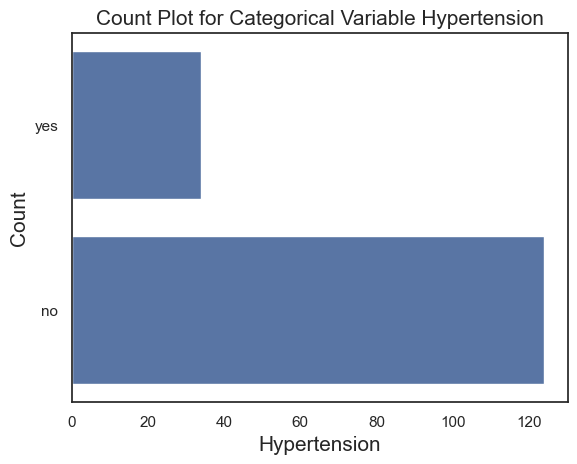

In [8]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df.htn)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable Hypertension', fontsize = 15)
plt.xlabel('Hypertension', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

In [52]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


### 2(c) Perform necessary actions to ‘fix’  defects  like missing values. (6 marks)

In [5]:
df.isnull().sum()

id                 0
age                0
bp                 0
sg                16
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo               0
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    int64  
 2   bp              158 non-null    int64  
 3   sg              142 non-null    float64
 4   al              158 non-null    int64  
 5   su              158 non-null    int64  
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    int64  
 11  bu              158 non-null    int64  
 12  sc              158 non-null    float64
 13  sod             158 non-null    int64  
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    int64  
 17  wc              158 non-null    int

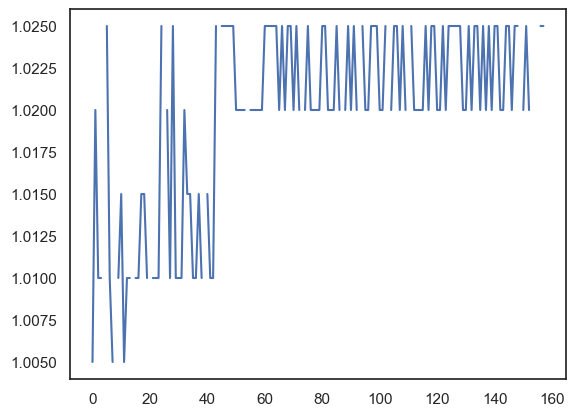

In [7]:
plt.plot(df['sg'])
plt.show()

In [8]:
from scipy import stats

stat, p_value = stats.shapiro(df['sg'])
print(f"Shapiro-Wilk Test statistic: {stat}, p-value: {p_value}")
if p_value > 0.05:
    print("Data is likely normal")
else:
    print("Data is not normal")

Shapiro-Wilk Test statistic: nan, p-value: 1.0
Data is likely normal


In [20]:
df['sg'].skew()

-1.0161264009288669

In [9]:
df['sg'].fillna(df['sg'].mean(),inplace=True)

In [10]:
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### 2 (d). Perform appropriate encoding on the categorical attributes. (8 Marks)

In [11]:
df_num = df.select_dtypes(include=['float64','int64'])
df_cat = df.select_dtypes('object')

print(df_cat.columns)

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')


In [12]:
df_num.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    int64  
 2   bp              158 non-null    int64  
 3   sg              158 non-null    float64
 4   al              158 non-null    int64  
 5   su              158 non-null    int64  
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    int64  
 11  bu              158 non-null    int64  
 12  sc              158 non-null    float64
 13  sod             158 non-null    int64  
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    int64  
 17  wc              158 non-null    int

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_cat.columns:
    df_cat[col] = le.fit_transform(df_cat[col])

In [15]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48,70,1.005000,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,9,53,90,1.020000,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,11,63,70,1.010000,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,14,68,80,1.010000,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,20,61,80,1.019965,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,395,55,80,1.019965,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
154,396,42,70,1.025000,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
155,397,12,80,1.019965,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
156,398,17,60,1.025000,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


### 2(e). Examine the correlation and summarize the relationship between variables. Use appropriate plots to justify the same and write your inferences. (8 marks)              

In [127]:
#pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Python\Anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [17]:
#pip install seaborn --upgrade

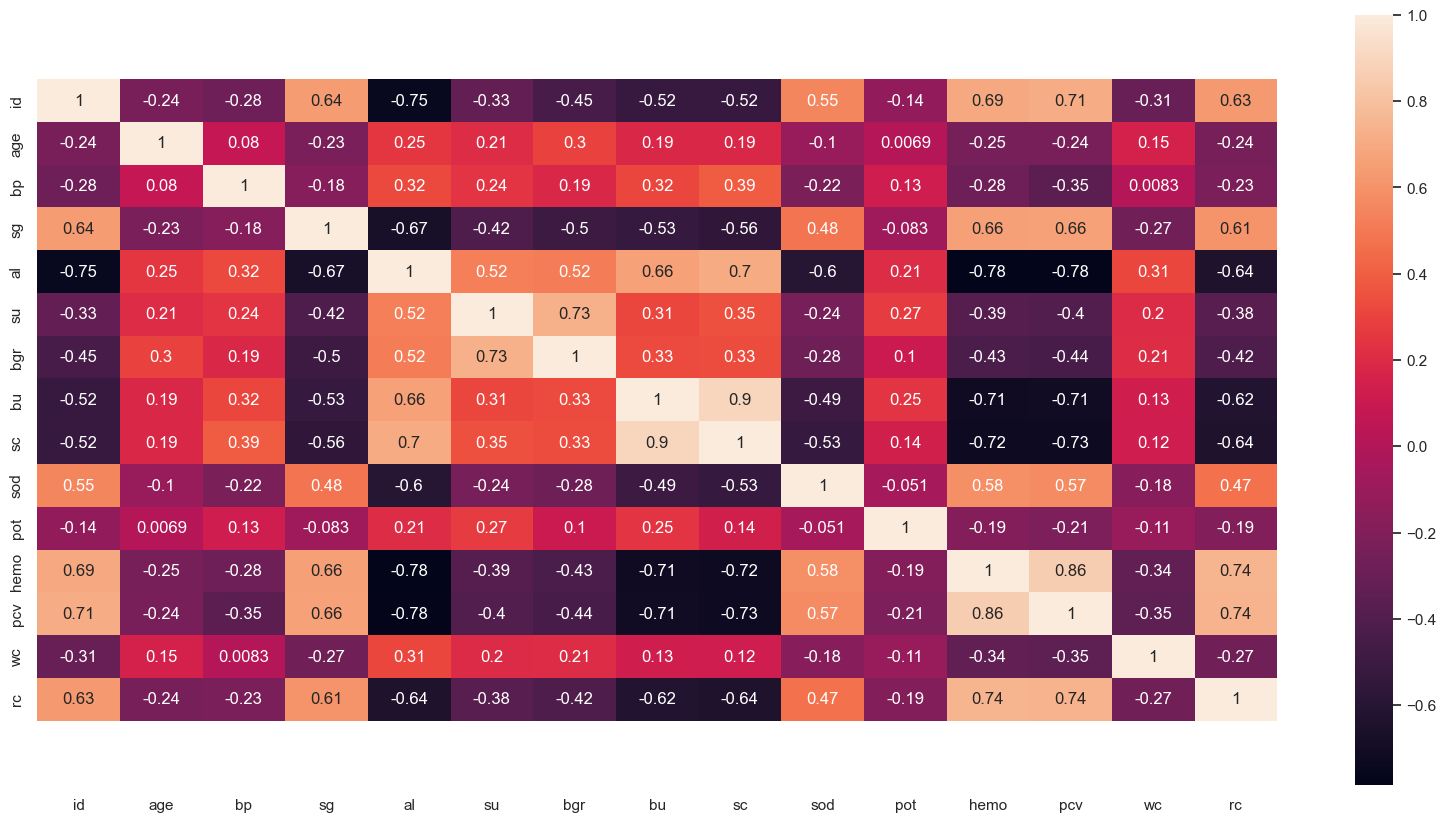

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_num.corr(), annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top + 1.5, bottom - 1.5 )
plt.show()

### 2 (vi) Check whether target column have balanced data or not. (3 Marks)

In [18]:
df['classification'].value_counts()

classification
notckd    115
ckd        43
Name: count, dtype: int64

### 2(f). Split dataset into train and test and check if its a good split. (3 marks)     

In [25]:
df2 = pd.concat([df_num,df_cat],axis=1)
X = df2.drop(['classification'],axis=1)
y = df2['classification']

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.3, random_state=42)

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(110, 25) (110,) (48, 25) (48,)


## Section C (40 marks)

### 3 (a) Make use of the imbalanced data and fit a Decision Tree and Random forest classifier Model. Compare the model performance using F1 Score and describe your observations based on output/results?(10 marks)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    int64  
 2   bp              158 non-null    int64  
 3   sg              158 non-null    float64
 4   al              158 non-null    int64  
 5   su              158 non-null    int64  
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    int64  
 11  bu              158 non-null    int64  
 12  sc              158 non-null    float64
 13  sod             158 non-null    int64  
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    int64  
 17  wc              158 non-null    int

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



### 3(b) Apply Sampling technique to balance the target column and check will it improve the previous model performance using balanced data. Write your observation based on results obtained.  (15 Marks)

### 3 (c) Choose any two model of your choice from Naive Bayes,KNN,Logistic regression,XGBoost and experiment with the balanced & imbalanced data. Write down your observations. (10 marks)


### 3 (d) From a business perspective answer the following: (5 Marks)
- a. Which data will you choose Balanced or Imbalanced and why?
- b. Which of the above trained models will you choose to move further as a final model and why?


import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Example DataFrame with imbalanced target variable
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'target': ['A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'B']
}

df = pd.DataFrame(data)

# Display the class distribution before balancing
print("Class distribution before balancing:")
print(df['target'].value_counts())

# --- Method 1: Random Over-sampling the Minority Class ---
# Separate majority and minority classes
df_majority = df[df['target'] == 'A']
df_minority = df[df['target'] == 'B']

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=df_majority.shape[0],  # Match the majority class size
                                 random_state=42)

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the class distribution after balancing
print("\nClass distribution after over-sampling the minority class:")
print(df_upsampled['target'].value_counts())

# --- Method 2: Synthetic Minority Over-sampling (SMOTE) ---
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Convert categorical target to numeric (required for SMOTE)
y_numeric = pd.factorize(y)[0]  # Converts 'A' -> 0, 'B' -> 1

# Initialize SMOTE and apply it
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y_numeric)

# Convert the resampled target variable back to its original categorical labels
y_res_categorical = pd.Categorical.from_codes(y_res, categories=y.unique())

# Create a new balanced DataFrame with the resampled data
df_smote = pd.DataFrame(X_res, columns=X.columns)
df_smote['target'] = y_res_categorical

# Display the class distribution after SMOTE balancing
print("\nClass distribution after SMOTE:")
print(df_smote['target'].value_counts())

# Plot the distributions for visual comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original Distribution
df['target'].value_counts().plot(kind='bar', ax=axes[0], title="Original Class Distribution")

# After Over-sampling
df_upsampled['target'].value_counts().plot(kind='bar', ax=axes[1], title="After Over-sampling")

# After SMOTE
df_smote['target'].value_counts().plot(kind='bar', ax=axes[2], title="After SMOTE")

plt.tight_layout()
plt.show()
